## Install and import Libraries

In [1]:
%%bash
if [ -z `which julia` ]; then
    wget -nv https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
pip install juliacall

In [2]:
from juliacall import Main as jl
jl.seval('using Pkg; Pkg.add(url="https://github.com/biplab37/PhaseGN.git")')
jl.seval('using PhaseGN')

[ Info: Precompiling PhaseGN [bbb8cc82-cd35-478e-9dcb-abc9b4aaacf4]


In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Calculations

In [4]:
κ = 0.0
Λ = 100.0
μ = 0.0
param = jl.Parameters(κ=κ, Λ=Λ)

In [6]:
def m(T):
    return jl.σ1(T,μ,param);

In [7]:
Trange = np.linspace(0.1,1.0,100)
sigma1 = np.vectorize(m)(Trange)

Text(0.8, 0.8, '$\\kappa =$0.0')

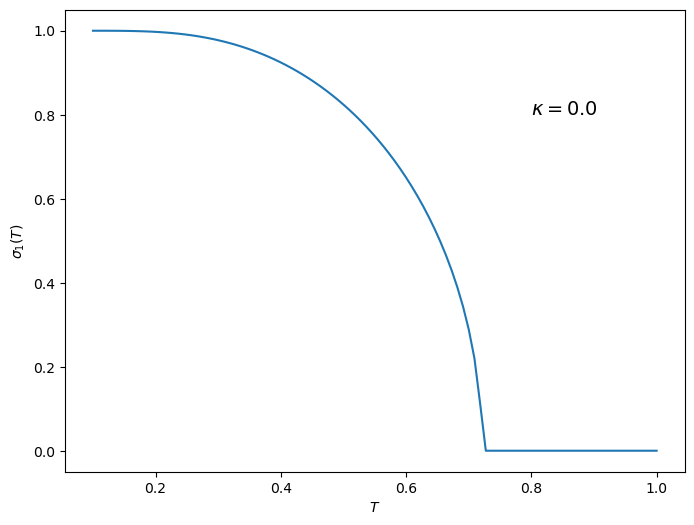

In [8]:
ax1 = plt.figure(figsize=(8,6)).add_subplot()
ax1.plot(Trange,sigma1)
ax1.set(xlabel=r'$T$',ylabel=r'$\sigma_1(T)$')
ax1.annotate(r'$\kappa =$'+str(κ),xy=(0.8,0.8),fontsize=14)


### Exciton Masses

In [15]:
param = jl.Parameters(κ=0.01, Λ=10.)
def Msigma(T):
    return jl.M_sigma(T,μ,param)
def Mphi(T):
    return jl.M_phi(T,μ,param)

In [18]:
msigma = np.vectorize(Msigma)(Trange)
mphi = np.vectorize(Mphi)(Trange)
twicesigma1 = 2*np.vectorize(m)(Trange)

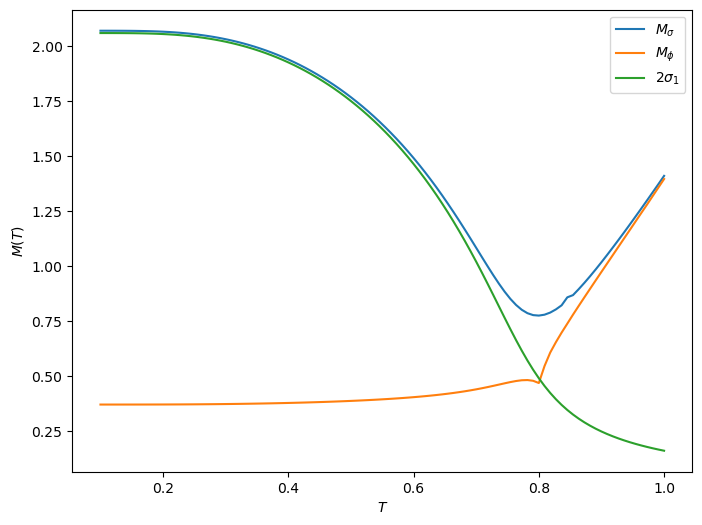

In [21]:
ax2 = plt.figure(figsize=(8,6)).add_subplot()
ax2.plot(Trange,msigma,label=r'$M_\sigma$')
ax2.plot(Trange,mphi,label=r'$M_\phi$')
ax2.plot(Trange,twicesigma1,label=r'$2\sigma_1$')
ax2.set(xlabel=r'$T$',ylabel=r'$M(T)$')
ax2.legend()